A Jupyter Widget

<IPython.core.display.Javascript object>


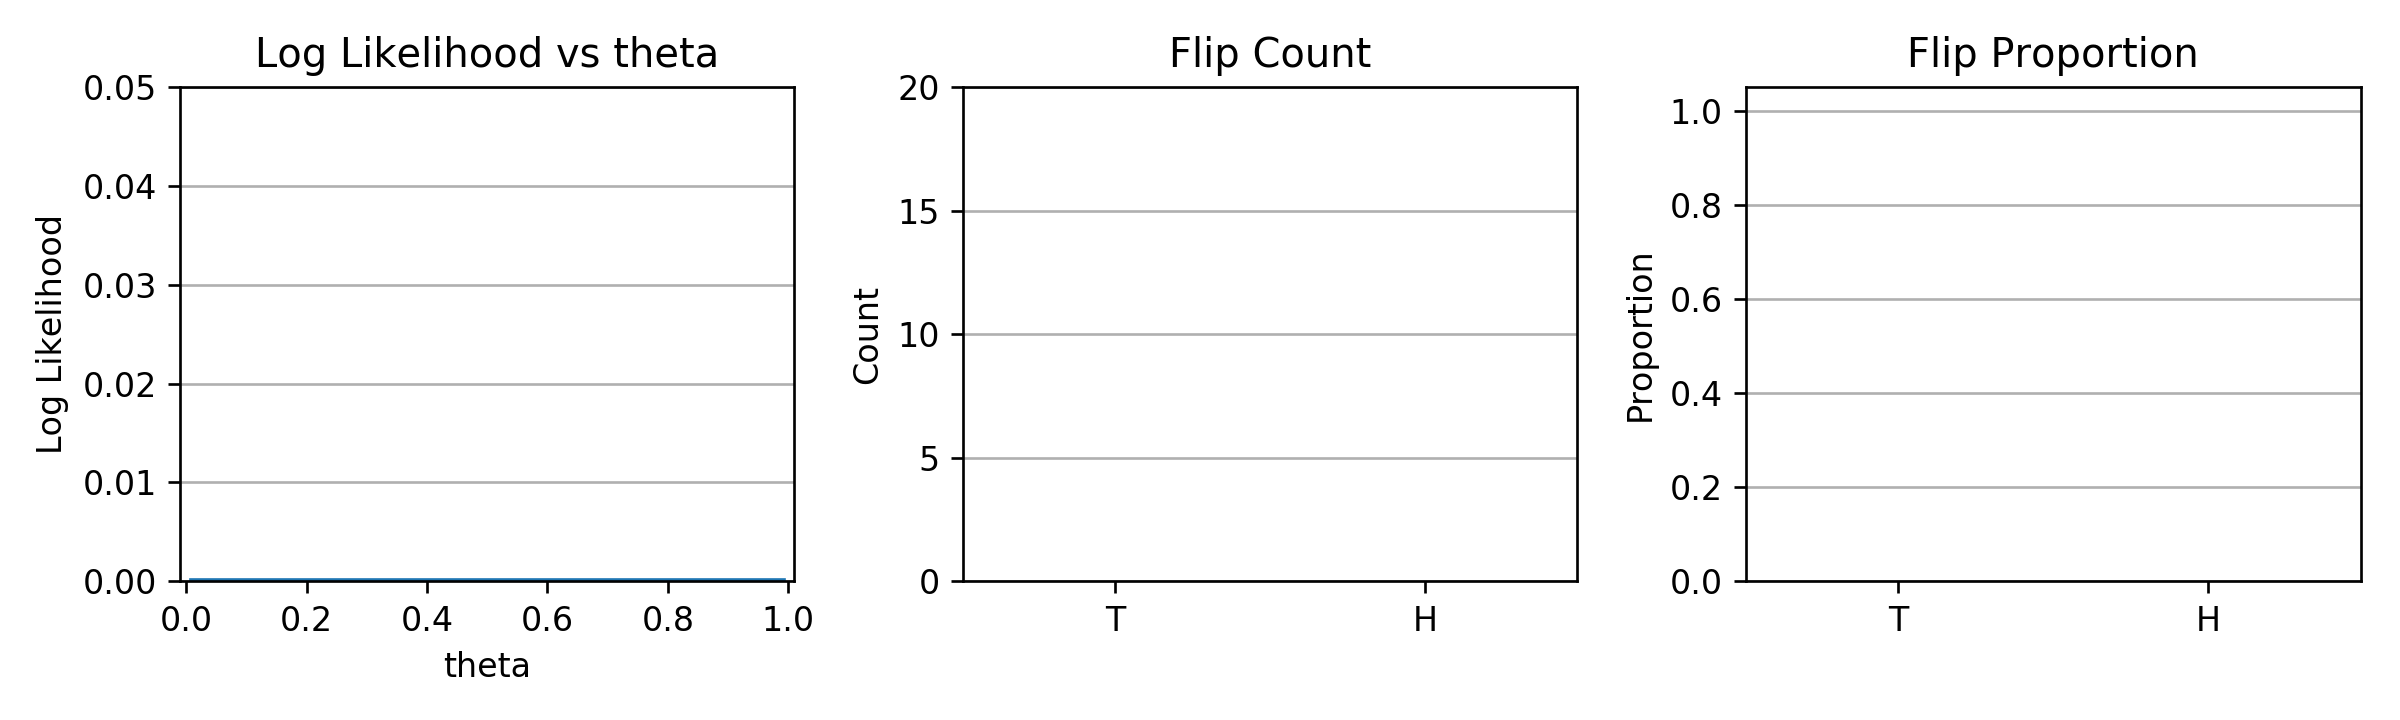

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
%matplotlib notebook

class bernoulli_model:
    theta=0.5
    x    = []
    nh   = 0
    nt   = 0 
    C    = 0
    
    def __init__(self):
        self.reset()
        
    def reset(self):
        self.theta=0.5
        self.x = []
        self.C = 0
        self.nt= 0
        self.nh= 0       
    
    def heads(self):
        self.C+=1
        self.nh+=1
        self.x.append(1)

    def tails(self):
        self.C+=1
        self.nt+=1
        self.x.append(0)

    def fit(self):
        if(self.C>0):
            self.theta = self.nh/float(self.C)
        else:
            return 0.5
    
    def get_theta(self):
        if(self.C>0):
            return self.nh/float(self.C)
        else:
            return 0.5
    
    def lik(self,thetas):
        out    = self.nh*np.log(thetas)+self.nt*np.log(1-thetas)
        ind1=(thetas==1.0)
        ind0=(thetas==0.0)
        if self.nt==0:
            out[ind1]=0
        else:
            out[ind1]=-np.inf
        if self.nh==0:
            out[ind0]=0
        else:
            out[ind0]=-np.inf        
        return out
class bernoulli_demo:
    
    def __init__(self):
    
        self.show_max = False
        self.model = bernoulli_model();
        self.wheads = widgets.Button(description="Heads")
        self.wtails = widgets.Button(description="Tails")
        self.wreset = widgets.Button(description="Reset")
        self.wcheck = widgets.Checkbox(value=False, description='Show Max')
        self.whbox1 = widgets.HBox([self.wheads, self.wtails,self.wreset,self.wcheck])
        self.wtails.on_click(self.on_tails_clicked)
        self.wheads.on_click(self.on_heads_clicked)
        self.wreset.on_click(self.on_reset_clicked)
        self.wcheck.observe(self.on_check_change, names='value')
        
        display(self.whbox1)
        self.fig, self.axarr = plt.subplots(1,3, figsize=(10,3))
        self.update_display()

    def on_check_change(self,change, names='value'):
        self.show_max = change["new"]
        self.update_display()
        
    def on_heads_clicked(self,b): 
        self.model.heads()
        self.update_display()
        
    def on_tails_clicked(self,b): 
        self.model.tails()
        self.update_display();
        
    def on_reset_clicked(self,b): 
        self.model.reset()
        self.show_max=False
        self.wcheck.value=False
        self.update_display()

    def update_display(self):
        thetas = np.linspace(0.01,0.99,100)
        lik    = self.model.lik(thetas)
        
        self.axarr[0].cla()
        self.axarr[0].plot(thetas,lik,linewidth=2)
        self.axarr[0].set_title('Log Likelihood vs theta')
        self.axarr[0].set_xlabel('theta')
        self.axarr[0].set_ylabel('Log Likelihood')
        self.axarr[0].set_xlim(-0.01,1.01)
        self.axarr[0].set_ylim(np.min(lik),0.05)
        self.axarr[0].yaxis.grid(True)
        
        if (self.show_max and self.model.C>0):
            self.model.fit()
            theta_max = self.model.theta
            lik_max   = self.model.lik(np.array([theta_max]))[0]
            self.axarr[0].plot(theta_max,lik_max,'sr')
            self.axarr[0].plot([theta_max,theta_max],[np.min(lik),lik_max],'k--')
        
        self.axarr[1].cla()
        self.axarr[1].set_title('Flip Count')
        self.axarr[1].bar(x=(1,2),height=(self.model.nt,self.model.nh))
        self.axarr[1].set_xticks((1,2))
        self.axarr[1].set_ylim(0,max(self.model.C,20))
        self.axarr[1].set_xticklabels(('T','H'))
        self.axarr[1].set_ylabel('Count')
        self.axarr[1].yaxis.grid(True)
        
        self.axarr[2].cla()
        self.axarr[2].set_title('Flip Proportion')
        if(self.model.C>0):
            self.axarr[2].bar(x=(1,2),height=(1-self.model.get_theta(),self.model.get_theta()))
        else:
            self.axarr[2].bar(x=(1,2),height=(0,0))
        self.axarr[2].set_ylim([0,1.05])
        self.axarr[2].set_xticks((1,2))
        self.axarr[2].set_xticklabels(('T','H'))
        self.axarr[2].set_ylabel('Proportion')
        self.axarr[2].yaxis.grid(True)

        self.fig.tight_layout()
    
bd = bernoulli_demo()